/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models
/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models
6.46 0.8552631578947368


<Quantity 277.69230769 mm>

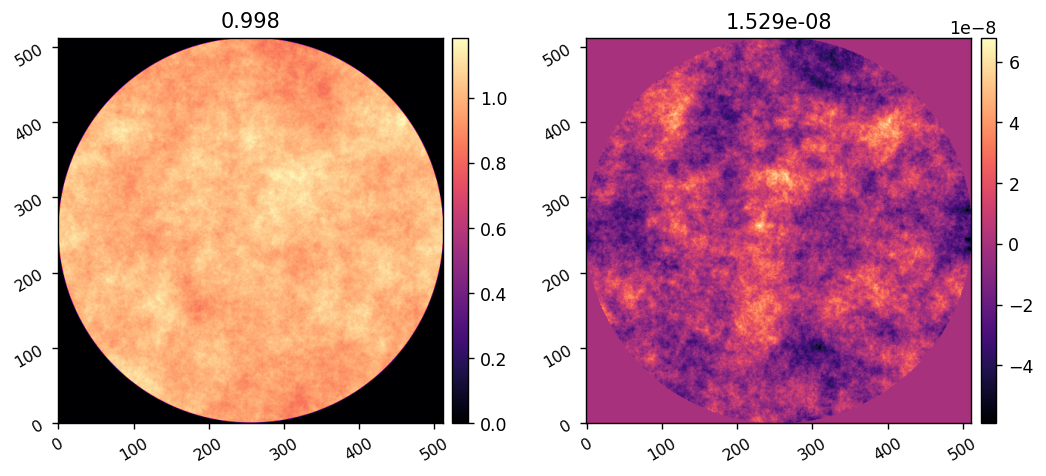

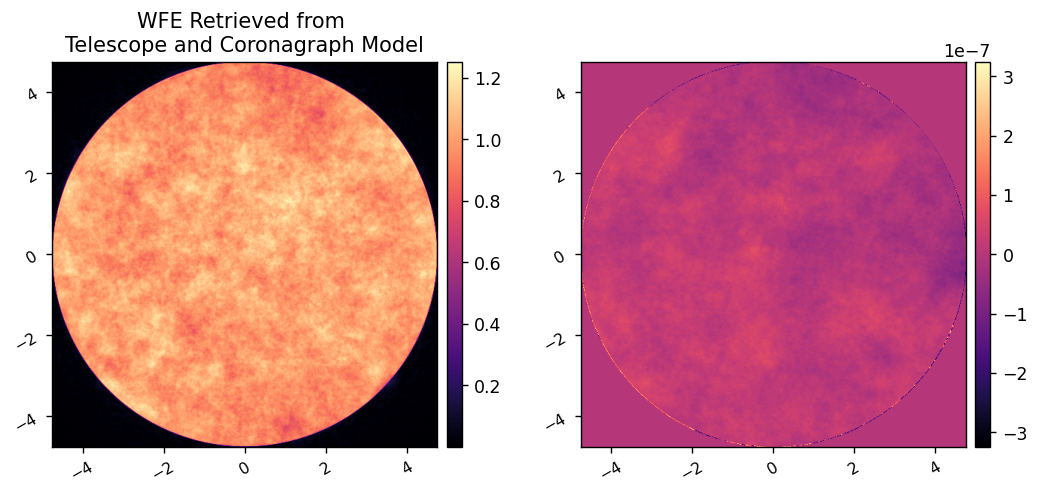

In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import poppy
import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import apra_pop_models
import apra_pop_models.fraunhofer_coro_2dm as fraunhofer
import apra_pop_models.fresnel_coro_2dm as fresnel
from apra_pop_models.math_module import xp, _scipy, ensure_np_array
import apra_pop_models.utils as utils

import apra_pop_models.efc_utils as efc_utils
import apra_pop_models.efc_2dm as efc
import apra_pop_models.pwp as pwp


from apra_pop_models.imshows import *

pupil_diam = 9.5*u.mm
wavelength_c = 650e-9*u.m

print(400/500*9.5 * 0.85, 6.5/ (400/500*9.5))

FN = 500
optimal_dm1_dm2 = (pupil_diam**2/(wavelength_c*FN)).to(u.mm)
display(optimal_dm1_dm2)

reload(utils)
wfe = utils.generate_wfe(diam=pupil_diam, npix=512, oversample=1,
                         opd_index=2.5, amp_index=2.5, 
                         opd_seed=12, amp_seed=34,
                         opd_rms=15*u.nm, amp_rms=0.05, 
                         wavelength=wavelength_c)
TELE_WFE = poppy.ArrayOpticalElement(name='WFE', 
                                     transmission=xp.abs(wfe),
                                     opd=xp.angle(wfe)*wavelength_c.to_value(u.m)/(2*np.pi), 
                                     pixelscale=pupil_diam/(512*u.pix),)

wfe_mask = TELE_WFE.amplitude>0
rms_amp = xp.sqrt(xp.mean(TELE_WFE.amplitude[wfe_mask]**2))
rms_opd = xp.sqrt(xp.mean(TELE_WFE.opd[wfe_mask]**2))
imshow2(TELE_WFE.amplitude, TELE_WFE.opd,  f'{rms_amp:.3f}', f'{rms_opd:.3e}')


# Load in the pupil plane wfe from the compact model of the coronagraph
wfe_fits = fits.open('../phase-retrieval-data/post_fpm_wfe_20240118.fits')
coro_wfe = wfe_fits[0].data
wfe_pxscl = wfe_fits[0].header['PIXELSCL'] * u.m/u.pix
wfe_fits.close()
CORO_WFE = poppy.ArrayOpticalElement(transmission=coro_wfe[0], opd=coro_wfe[1],
                                     pixelscale=wfe_pxscl,
                                     name='Total WFE')
imshow2(CORO_WFE.amplitude, CORO_WFE.opd, 
        'WFE Retrieved from \nTelescope and Coronagraph Model',
        pxscl=wfe_pxscl.to(u.mm/u.pix))

In [ ]:
coro.

/home/kianmilani/Projects/apra-howfsc-models/apra_pop_models
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


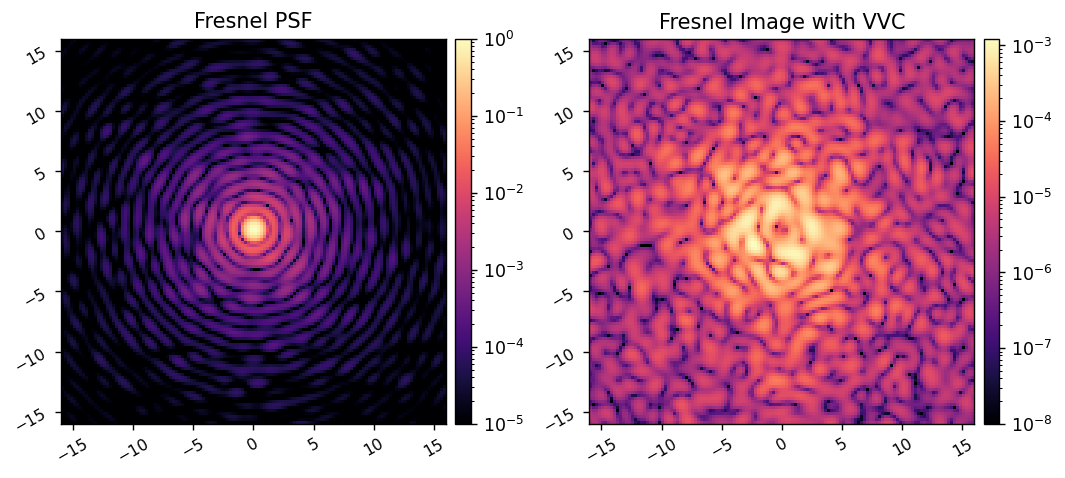

In [8]:
reload(fresnel)
coro = fresnel.CORO(npix=512, oversample=8,
                    TELEWFE=TELE_WFE,
                    use_opds=True,
                    # psf_pixelscale=10*u.um/u.pix,
                   )

psf = coro.snap()
coro.Imax_ref = xp.max(psf)

ref_psf = coro.snap()

coro.FPM = apra_pop_models.agpm.IdealAGPM(name='VVC', wavelength=wavelength_c, charge=6, singularity=20*u.um)
ref_im = coro.snap()

imshow2(ref_psf, ref_im, 'Fresnel PSF', 'Fresnel Image with VVC', 
        pxscl=coro.psf_pixelscale_lamD, lognorm=True, vmin1=1e-5, vmin2=1e-8)

In [7]:
9.5*.8

7.6000000000000005

In [9]:
coro.psf_pixelscale_lamD, coro.psf_pixelscale

(0.25, <Quantity 5.e-06 m / pix>)

In [10]:
coro.lyot_diam

<Quantity 6.5 mm>

In [11]:
6.5/0.8

8.125

In [15]:
model.lyot_diam/model.pupil_lyot_mag

<Quantity 8.125 mm>

In [76]:
display((coro.wavelength_c*coro.fl_oap9/(coro.lyot_diam)).to(u.um))
display((model.wavelength_c*model.imaging_fl/(model.lyot_diam)).to(u.um))

<Quantity 20. um>

<Quantity 20. um>

In [67]:
coro.um_per_lamD

<Quantity 20. um>

In [68]:
model.psf_pixelscale_lamD, model.psf_pixelscale

(0.25, <Quantity 5.e-06 m / pix>)

In [63]:
model.lyot_diam

<Quantity 6.5 mm>

In [61]:
model.um_per_lamD

<Quantity 20. um>

In [40]:
coro.psf_pixelscale_lamD, coro.psf_pixelscale
coro.um_per_lamD

psf_pixelscale_lamD = 1/4
display((coro.wavelength_c*coro.fl_oap9/(coro.pupil_diam*coro.pupil_lyot_mag)).to(u.um))
display((coro.wavelength_c*coro.fl_oap9/(coro.pupil_diam*coro.pupil_lyot_mag)*psf_pixelscale_lamD).to(u.um))
display((coro.wavelength_c*coro.fl_oap9/(coro.lyot_diam)).to(u.um))
display((coro.wavelength_c*coro.fl_oap9/(coro.lyot_diam)*psf_pixelscale_lamD).to(u.um))


<Quantity 17.10526316 um>

<Quantity 4.27631579 um>

<Quantity 20. um>

<Quantity 5. um>

Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.
Using the influence function supplied.
Including factor of 2 from reflection when computing OPD.


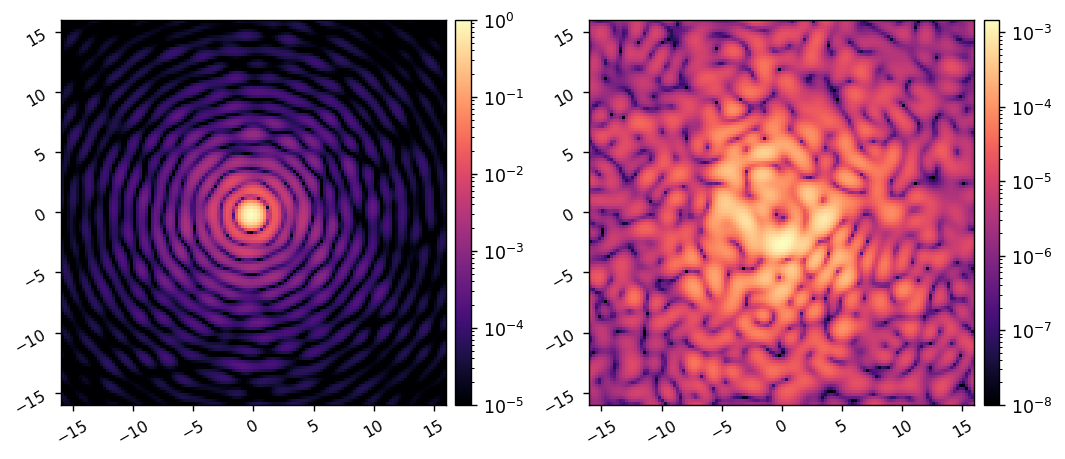

In [13]:
reload(fraunhofer)
model = fraunhofer.CORO(npix=512, oversample=16, npsf=128,
                        RETRIEVED=CORO_WFE,
                       )

# model.psf_pixelscale_lamD = 1/3.5

model.reverse_parity = True
psf = model.snap()
model.Imax_ref = xp.max(psf)

model_psf = model.snap()

vortex_phasor = fraunhofer.make_vortex_phase_mask(model.N, 
                                                  # singularity=400*u.um,
                                                  focal_length=500*u.mm, pupil_diam=model.pupil_diam, 
                                                  wavelength=model.wavelength_c)
model.FPM = vortex_phasor
model_im = model.snap()

imshow2(model_psf, model_im, pxscl=model.psf_pixelscale_lamD,
        lognorm=True, vmin1=1e-5, vmin2=1e-8, )

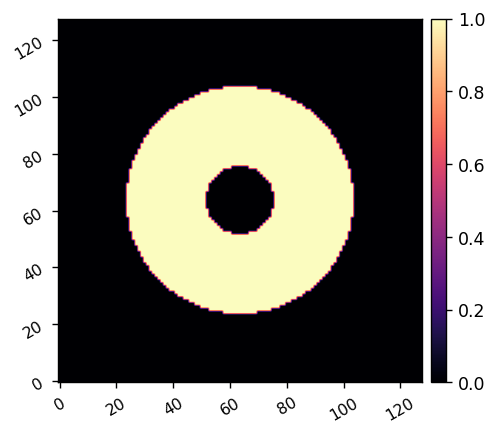

In [45]:
control_mask = efc_utils.create_annular_focal_plane_mask(model, inner_radius=3, outer_radius=10, plot=True)
Nmask = int(control_mask.sum())
mean_ni = xp.mean(ref_im[control_mask])

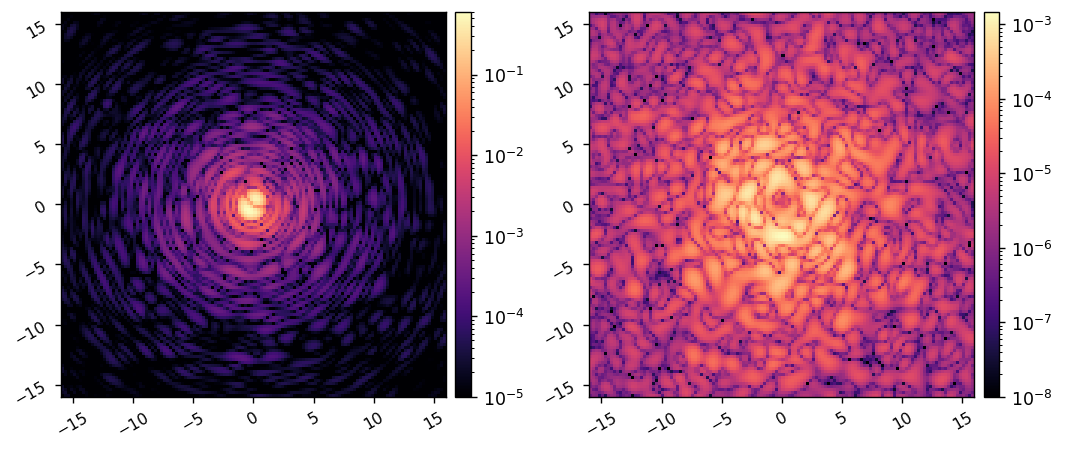

In [59]:
imshow2(xp.abs(ref_psf-model_psf), xp.abs(ref_im-model_im), pxscl=model.psf_pixelscale_lamD,
        lognorm=True, vmin1=1e-5, vmin2=1e-8,)

<Quantity 0.0102 m>

In [24]:
coro.dm_active_diam, model.dm_active_diam
coro.dm_fill

(<Quantity 0.0102 m>, <Quantity 0.0102 m>)

In [10]:
coro.psf_pixelscale_lamD, model.psf_pixelscale_lamD

(0.25, 0.25)

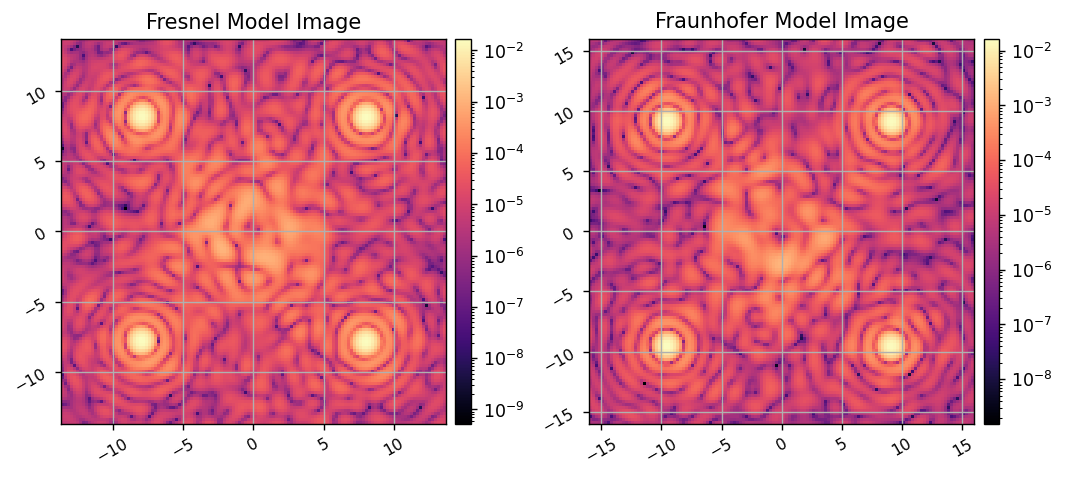

In [47]:
pup_ratio = model.pupil_diam.to_value(u.m)/model.dm_active_diam.to_value(u.m)
xpp = (xp.arange(-model.Nact//2, model.Nact//2) + 1/2)
ppx, ppy = xp.meshgrid(xpp,xpp)
amp = 2e-8
separation = 10
comm1 = amp*xp.cos(2*np.pi*(ppx + ppy)*separation/model.Nact)*xp.array(model.dm_mask)
comm2 = amp*xp.cos(2*np.pi*(ppx - ppy)*separation/model.Nact)*xp.array(model.dm_mask)

coro.set_dm1(ensure_np_array(comm1))
coro.set_dm2(ensure_np_array(comm2))
test_im = coro.snap()
coro.reset_dms()

model.set_dm1(ensure_np_array(comm1))
model.set_dm2(ensure_np_array(comm2))
test_im_m = model.snap()
model.reset_dms()

imshow2(test_im, test_im_m, 
        'Fresnel Model Image', 'Fraunhofer Model Image', 
        lognorm=True, 
        pxscl1=coro.psf_pixelscale_lamD, pxscl2=model.psf_pixelscale_lamD,
        grid=True)

In [17]:
model.pupil_diam, coro.pupil_diam
model.npix, coro.npix
model.wavelength_c, coro.wavelength_c
model.lyot_diam, coro.lyot_diam

(<Quantity 6.5 mm>, <Quantity 6.5 mm>)

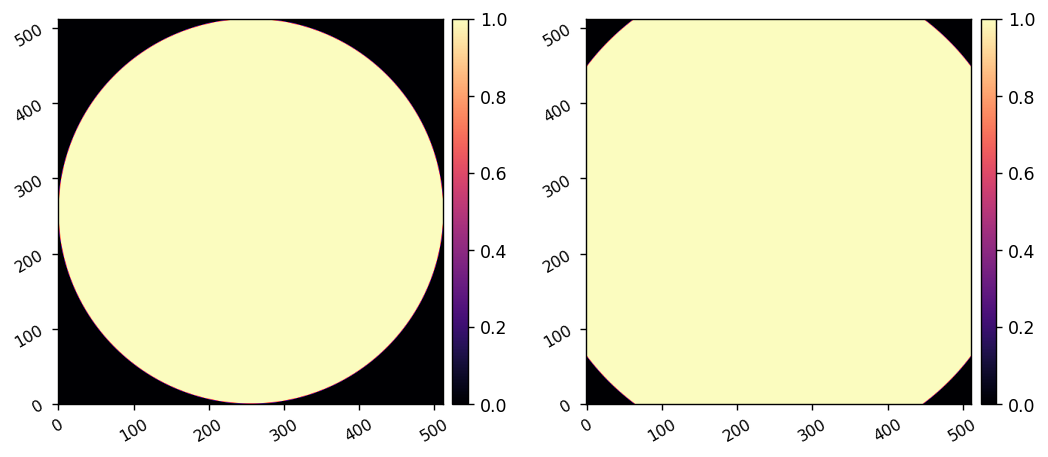

In [22]:
wf = poppy.FresnelWavefront(beam_radius=6.5*u.mm/2, npix=512, oversample=1)
ls = coro.LYOT.get_transmission(wf)
lsm = model.LYOT.get_transmission(wf)
imshow2(ls, lsm)

# choose modes and compute Jacobian

In [25]:
poke_modes = efc_utils.create_all_poke_modes(model.dm_mask, ndms=2)

Calculating Jacobian: 
	Calculated response for mode 1904/1904. Elapsed time=796.309 sec.
Jacobian built in 796.310 sec


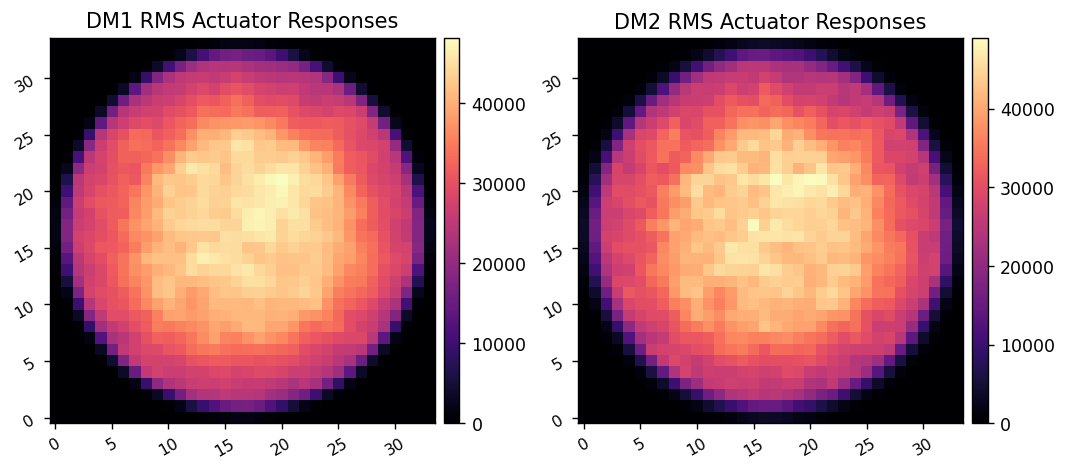

In [26]:
jac = efc.build_jacobian(model, 2e-9, poke_modes, control_mask, plot_responses=True,)

# Run EFC

### Test PWP

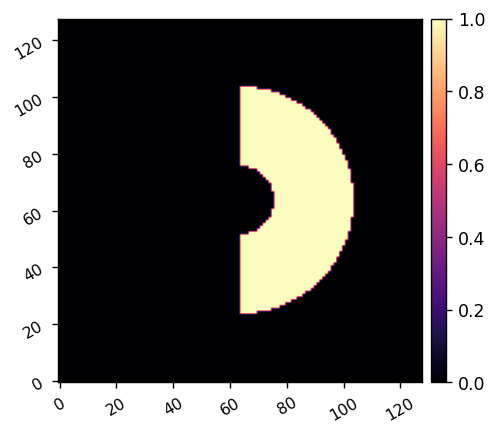

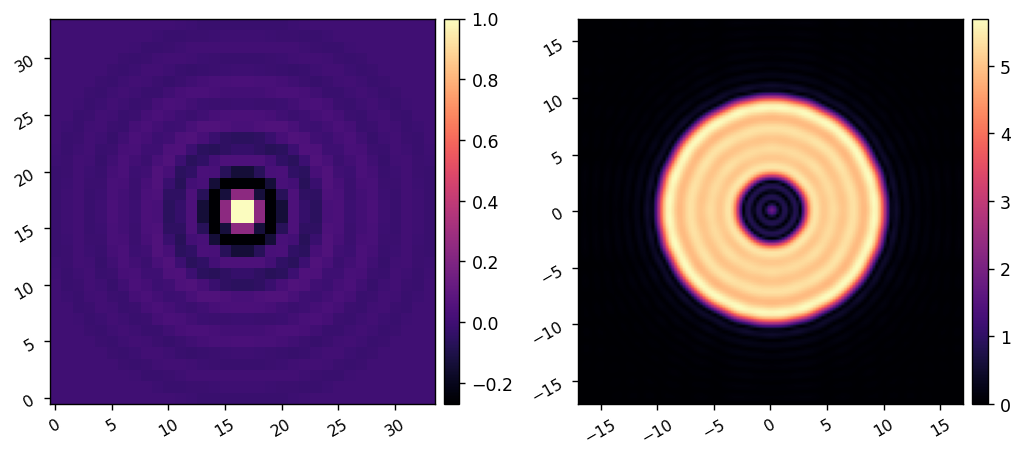

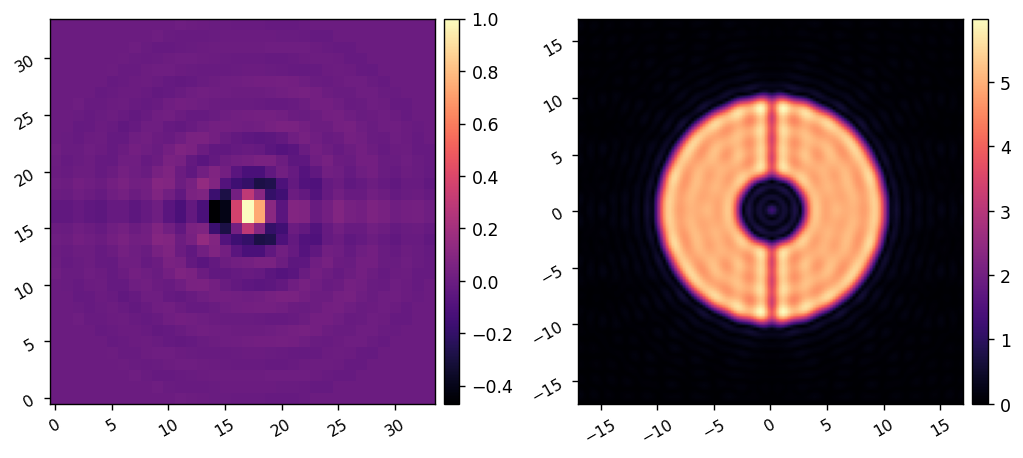

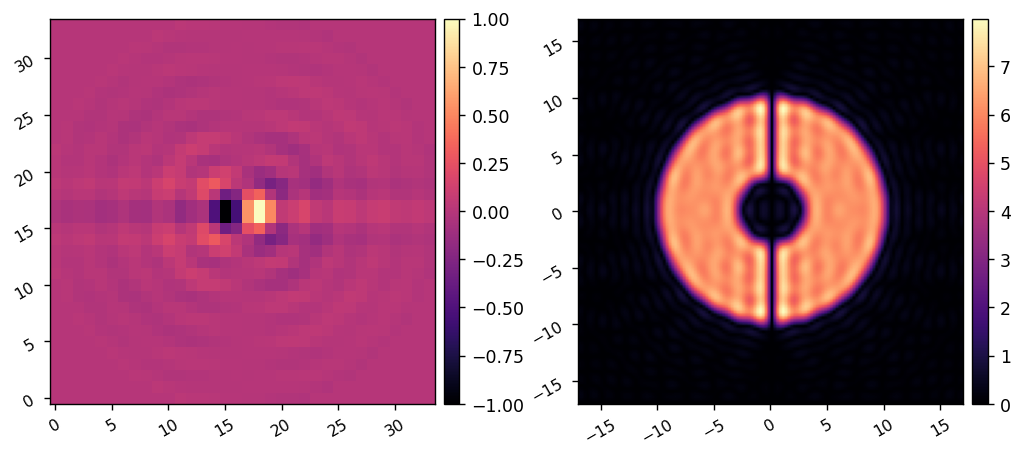

In [69]:
probe_amp = 10e-9
probe_offset = (0,0)

control_mask = efc_utils.create_annular_focal_plane_mask(model, inner_radius=3, outer_radius=10, edge=0,   plot=True)
probe_modes = efc_utils.create_fourier_probes(coro, control_mask, fourier_sampling=0.25, 
                                            #    shift=[probe_offset, probe_offset], 
                                               nprobes=3,
                                                plot=True, calc_responses=True)
probes = probe_amp * probe_modes

In [ ]:
model.reset_dms()
coro.reset_dms()

images = xp.array([ref_im])
dm1_commands = xp.array([coro.get_dm1()])
dm2_commands = xp.array([coro.get_dm2()])
regs = xp.array([])

In [ ]:
reload(efc)

reg_fun = efc_utils.beta_reg
# reg_conds = -1
reg_conds = -2.5
# reg_conds = -3.5
# reg_conds = -4.5
# reg_conds = -5

images, dm1_commands, dm2_commands, regs = efc.run_efc_perfect(model, 
                                                                jac, 
                                                                reg_fun, reg_conds,
                                                                poke_modes,
                                                                # control_matrix,
                                                                control_mask, 
                                                                # est_fun=pwp_fun, est_params=pwp_params,
                                                                # nonlin_model=nonlin_model,  
                                                                Imax_unocc=1,
                                                                loop_gain=0.5, 
                                                                leakage=0.0,
                                                                iterations=3, 
                                                                plot_all=True, 
                                                                # plot_sms=True,
                                                                # plot_radial_contrast=True,
                                                                old_images=images,
                                                                old_dm1_commands=dm1_commands,
                                                                old_dm2_commands=dm2_commands,
                                                                old_regs=regs,
                                                                )